## Ekstraksi keyword

---



In [1]:
import pandas as pd

In [2]:
# menghubungkan ke drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# membaca file CSV yang berada pada path dan menyimpannya dalam sebuah DataFrame bernama data.
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/Data/data_label_news.csv")
data

,Date,Title,Content,Label
0,01-10-2023,Megawati Ungkap Orang Luar Tak Bisa Langsung J...,"jpnn.com, JAKARTA - Ketua Umum PDI Perjuangan ...",politik
1,01-10-2023,"Peringati Hari Kesaktian Pancasila, KawanJuang...","jpnn.com, PURWAKARTA - Para sukarelawan penduk...",politik
2,01-10-2023,"Ganjar dan Anies Hadiri Acara IdeaFest, di Man...","jpnn.com, JAKARTA - Ketiga bacapres Ganjar Pra...",politik
3,01-10-2023,"Silaturahmi ke Rembang, Anies Diberi Tongkat K...","jpnn.com, JAKARTA - Anies Baswedan mengunjungi...",politik
4,01-10-2023,"Survei Erick Thohir Teratas di Jatim, Pengamat...","jpnn.com, JAKARTA - Nama Erick Thohir punya ke...",politik
...,...,...,...,...
1723,01-11-2023,"Lalu Muhammad Zohri Finis Keenam, Indonesia Pa...","jpnn.com, JAKARTA - Kontingen atlet Indonesia ...",Olahraga
1724,01-11-2023,Garuda Muda Siap Beri Obat Pelipur Lara Bagi F...,jpnn.com - Tim bulu tangkis beregu campuran In...,Olahraga
1725,01-11-2023,Bulu Tangkis Asian Games 2022: Tim Putra China...,jpnn.com - Tim bulu tangkis beregu putra China...,Olahraga
1726,01-11-2023,"Asian Games 2022: Kehabisan Bensin, Timnas Bas...",jpnn.com - Timnas basket putra Indonesia menga...,Olahraga


In [4]:
#install library
!pip install sastrawi
!pip install swifter
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=41d820e648dc732565ddaf5cfb19d0ae78241ea27d49a71489002c6a6e6681a4
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


## Memecah kalimat dari dokumen

In [5]:
# Impor pustaka spaCy
import spacy

# Memuat model bahasa Inggris spaCy
nlp = spacy.load("en_core_web_sm")

# Mengambil dokumen
dokumen = data['Content'].iloc[1700]

# Analisis teks menggunakan spaCy
doc = nlp(dokumen)

# Mencetak setiap kalimat dari dokumen
for i, kalimat in enumerate(doc.sents):
    print(f"Kalimat {i + 1}: {kalimat.text}")


Kalimat 1: jpnn.com - TOCHIGI – Bendera merah terpaksa dikibarkan saat race MotoGP Jepang 2023 di Mobility Resort Motegi, Minggu (1/10) siang WIB baru setengah jalan.
Kalimat 2: Kondisi trek yang tergenang air membuat keselamatan pembalap terancam.
Kalimat 3: Saat red flag berkibar, Jorge Martin memimpin, disusul Francesco Bagnaia, dan Marc Marquez.
Kalimat 4: Tak lama setelah seluruh pembalap tiba di garasinya masing-masing, hujan deras benar-benar mengguyur Mobility Resort Motegi.
Kalimat 5: Sebelumnya, seluruh pembalap sudah mengganti motornya (penyesuaian ban).
Kalimat 6: Hampir 80 persen pembalap mengganti motor (flag to flag) seusai
Kalimat 7: lap ke-1.Perlombaan pun menjadi tegang.
Kalimat 8: Para pembalap berupaya menjaga kesabaran.
Kalimat 9: Pada lap ke-10, di saat trek makin basah, Martin memimpin, disusul Bagnaia, Marco Bezzecchi, Miguel Oliveira, dan Marquez.
Kalimat 10: Seluruh pembalap memacu motornya dengan penuh kehati-hatian.


## Membentuk co-occurancy matriks dari kata dalam kalimat

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
import nltk
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from itertools import combinations
from collections import defaultdict
import string
import pandas as pd
from nltk.corpus import stopwords

# Download NLTK stopwords for Indonesian
nltk.download('stopwords')

# Tokenisasi kalimat
kalimat_list = sent_tokenize(dokumen)

# Mengambil 3 sampai 5 kalimat
kalimat_terpilih = kalimat_list[:10]

# Menggabungkan kalimat menjadi satu teks
teks = ' '.join(kalimat_terpilih)

# Menghilangkan tanda baca ,.- dari teks
teks_cleaned = teks.translate(str.maketrans('', '', string.punctuation))

# Tokenisasi kata
words = word_tokenize(teks_cleaned.lower())  # Mengonversi ke huruf kecil

# Hapus stopwords menggunakan NLTK stopwords Bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Membuat matriks co-occurrence
co_occurrence_matrix = defaultdict(lambda: defaultdict(int))

# Menghitung frekuensi kemunculan kata bersama
for i, j in combinations(range(len(filtered_words)), 2):
    word_i, word_j = filtered_words[i], filtered_words[j]
    co_occurrence_matrix[word_i][word_j] += 1
    co_occurrence_matrix[word_j][word_i] += 1

# Menampilkan matriks co-occurrence dalam bentuk tabel menggunakan pandas
words_list = sorted(set(filtered_words))
matrix_size = len(words_list)
co_occurrence_matrix_array = np.zeros((matrix_size, matrix_size), dtype=int)

for i, word_i in enumerate(words_list):
    for j, word_j in enumerate(words_list):
        co_occurrence_matrix_array[i][j] = co_occurrence_matrix[word_i][word_j]

df_co_occurrence = pd.DataFrame(co_occurrence_matrix_array, index=words_list, columns=words_list)
print("DataFrame Co-occurrence:")
print(df_co_occurrence)

# Membuat graf dari matriks co-occurrence
G = nx.Graph(co_occurrence_matrix_array)


DataFrame Co-occurrence:
         110  2023  80  air  bagnaia  ban  basah  benarbenar  bendera  \
110        0     1   1    1        2    1      1           1        1   
2023       1     0   1    1        2    1      1           1        1   
80         1     1   0    1        2    1      1           1        1   
air        1     1   1    0        2    1      1           1        1   
bagnaia    2     2   2    2        2    2      2           2        2   
...      ...   ...  ..  ...      ...  ...    ...         ...      ...   
to         1     1   1    1        2    1      1           1        1   
tochigi    1     1   1    1        2    1      1           1        1   
trek       2     2   2    2        4    2      2           2        2   
wib        1     1   1    1        2    1      1           1        1   
–          1     1   1    1        2    1      1           1        1   

         berkibar  ...  siang  tegang  terancamsaat  tergenang  terpaksa  to  \
110             1 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# Menentukan node dan kata pada setiap node
node_kata_mapping = {i: kata for i, kata in enumerate(words_list)}

# Menampilkan node dan kata pada setiap node
for node, kata in node_kata_mapping.items():
    print(f"Node {node}: Kata = {kata}")

Node 0: Kata = 110
Node 1: Kata = 2023
Node 2: Kata = 80
Node 3: Kata = air
Node 4: Kata = bagnaia
Node 5: Kata = ban
Node 6: Kata = basah
Node 7: Kata = benarbenar
Node 8: Kata = bendera
Node 9: Kata = berkibar
Node 10: Kata = berupaya
Node 11: Kata = bezzecchi
Node 12: Kata = deras
Node 13: Kata = dikibarkan
Node 14: Kata = disusul
Node 15: Kata = flag
Node 16: Kata = francesco
Node 17: Kata = garasinya
Node 18: Kata = hujan
Node 19: Kata = jalankondisi
Node 20: Kata = jepang
Node 21: Kata = jorge
Node 22: Kata = jpnncom
Node 23: Kata = ke10
Node 24: Kata = ke1perlombaan
Node 25: Kata = kehatihatian
Node 26: Kata = kesabaranpada
Node 27: Kata = keselamatan
Node 28: Kata = lap
Node 29: Kata = marc
Node 30: Kata = marco
Node 31: Kata = marquezseluruh
Node 32: Kata = marqueztak
Node 33: Kata = martin
Node 34: Kata = masingmasing
Node 35: Kata = memacu
Node 36: Kata = memimpin
Node 37: Kata = mengganti
Node 38: Kata = mengguyur
Node 39: Kata = menjaga
Node 40: Kata = merah
Node 41: Kata 

## Membentuk grap dari co-occurancy matriks G

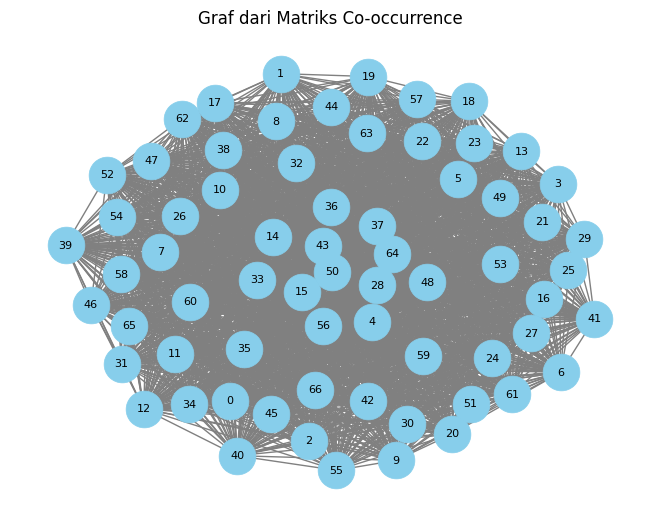

In [9]:
# Menampilkan graf
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=700, node_color='skyblue', edge_color='gray', arrowsize=10, linewidths=0.5)
plt.title('Graf dari Matriks Co-occurrence')
plt.show()

## Menghitung centrality dari node dalam graph

**-Clossnes centrality nx.centrality(G)**

In [10]:
# menghitung closeness centrality dari setiap simpul pada graf berarah G, mengurutkannya secara menurun
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Closeness Centrality:")
for node, closeness in sorted_closeness:
    print(f"Node {node}: {closeness:.4f}")


Sorted Closeness Centrality:
Node 0: 1.0000
Node 1: 1.0000
Node 2: 1.0000
Node 3: 1.0000
Node 4: 1.0000
Node 5: 1.0000
Node 6: 1.0000
Node 7: 1.0000
Node 8: 1.0000
Node 9: 1.0000
Node 10: 1.0000
Node 11: 1.0000
Node 12: 1.0000
Node 13: 1.0000
Node 14: 1.0000
Node 15: 1.0000
Node 16: 1.0000
Node 17: 1.0000
Node 18: 1.0000
Node 19: 1.0000
Node 20: 1.0000
Node 21: 1.0000
Node 22: 1.0000
Node 23: 1.0000
Node 24: 1.0000
Node 25: 1.0000
Node 26: 1.0000
Node 27: 1.0000
Node 28: 1.0000
Node 29: 1.0000
Node 30: 1.0000
Node 31: 1.0000
Node 32: 1.0000
Node 33: 1.0000
Node 34: 1.0000
Node 35: 1.0000
Node 36: 1.0000
Node 37: 1.0000
Node 38: 1.0000
Node 39: 1.0000
Node 40: 1.0000
Node 41: 1.0000
Node 42: 1.0000
Node 43: 1.0000
Node 44: 1.0000
Node 45: 1.0000
Node 46: 1.0000
Node 47: 1.0000
Node 48: 1.0000
Node 49: 1.0000
Node 50: 1.0000
Node 51: 1.0000
Node 52: 1.0000
Node 53: 1.0000
Node 54: 1.0000
Node 55: 1.0000
Node 56: 1.0000
Node 57: 1.0000
Node 58: 1.0000
Node 59: 1.0000
Node 60: 1.0000
Node

**- Pagerank centrality nx.pagerank (G)**

In [11]:
# Menampilkan PageRank centrality
pagerank_centrality = nx.pagerank(G)
print("PageRank Centrality:")
for node, centrality in pagerank_centrality.items():
    print(f"{node}: {centrality}")

PageRank Centrality:
0: 0.01235325776841179
1: 0.01235325776841179
2: 0.01235325776841179
3: 0.01235325776841179
4: 0.022490418328200673
5: 0.01235325776841179
6: 0.01235325776841179
7: 0.01235325776841179
8: 0.01235325776841179
9: 0.01235325776841179
10: 0.01235325776841179
11: 0.01235325776841179
12: 0.01235325776841179
13: 0.01235325776841179
14: 0.02249041832820067
15: 0.032627578887989554
16: 0.01235325776841179
17: 0.01235325776841179
18: 0.01235325776841179
19: 0.01235325776841179
20: 0.01235325776841179
21: 0.01235325776841179
22: 0.01235325776841179
23: 0.01235325776841179
24: 0.01235325776841179
25: 0.01235325776841179
26: 0.01235325776841179
27: 0.01235325776841179
28: 0.02249041832820067
29: 0.01235325776841179
30: 0.01235325776841179
31: 0.01235325776841179
32: 0.01235325776841179
33: 0.02249041832820067
34: 0.01235325776841179
35: 0.01235325776841179
36: 0.02249041832820067
37: 0.02249041832820067
38: 0.01235325776841179
39: 0.01235325776841179
40: 0.01235325776841179
41:

## Merangking node (kata) dari centrality

In [12]:
# Menampilkan node yang diurutkan berdasarkan PageRank centrality
sorted_nodes = sorted(pagerank_centrality, key=pagerank_centrality.get, reverse=True)

print("Node yang diurutkan berdasarkan PageRank Centrality:")
for node in sorted_nodes:
    print(f"{node}: {pagerank_centrality[node]}")

Node yang diurutkan berdasarkan PageRank Centrality:
50: 0.06303906056735618
15: 0.032627578887989554
48: 0.022490418328200677
56: 0.022490418328200677
64: 0.022490418328200677
4: 0.022490418328200673
14: 0.02249041832820067
28: 0.02249041832820067
33: 0.02249041832820067
36: 0.02249041832820067
37: 0.02249041832820067
43: 0.02249041832820067
0: 0.01235325776841179
1: 0.01235325776841179
2: 0.01235325776841179
3: 0.01235325776841179
5: 0.01235325776841179
6: 0.01235325776841179
7: 0.01235325776841179
8: 0.01235325776841179
9: 0.01235325776841179
10: 0.01235325776841179
11: 0.01235325776841179
12: 0.01235325776841179
13: 0.01235325776841179
16: 0.01235325776841179
17: 0.01235325776841179
18: 0.01235325776841179
19: 0.01235325776841179
20: 0.01235325776841179
21: 0.01235325776841179
22: 0.01235325776841179
23: 0.01235325776841179
24: 0.01235325776841179
25: 0.01235325776841179
26: 0.01235325776841179
27: 0.01235325776841179
29: 0.01235325776841179
30: 0.01235325776841179
31: 0.0123532577

## menghitung manual page rank

## Menentukan beberapa kata penting berdasarkan rangking

In [13]:
# Menentukan jumlah kata penting yang ingin diambil
jumlah_kata_penting = 5

# Memilih sejumlah node teratas berdasarkan PageRank centrality
kata_penting = sorted(pagerank_centrality, key=pagerank_centrality.get, reverse=True)[:jumlah_kata_penting]

# Membuat pemetaan node ke kata
node_kata_mapping = {node: kata for node, kata in enumerate(words)}

# Menampilkan kata pada node terpenting saja
print(f"{jumlah_kata_penting} Kata Penting Beserta PageRank Centrality:")
for node in kata_penting:
    kata = node_kata_mapping.get(node, "Tidak Diketahui")
    centrality = pagerank_centrality.get(node, "Tidak Diketahui")
    print(f"Node {node}: Kata = {kata}, PageRank Centrality = {centrality}")

5 Kata Penting Beserta PageRank Centrality:
Node 50: Kata = masingmasing, PageRank Centrality = 0.06303906056735618
Node 15: Kata = motegi, PageRank Centrality = 0.032627578887989554
Node 48: Kata = di, PageRank Centrality = 0.022490418328200677
Node 56: Kata = resort, PageRank Centrality = 0.022490418328200677
Node 64: Kata = ban, PageRank Centrality = 0.022490418328200677
